<a href="https://colab.research.google.com/github/Dac196/VisionComputer/blob/main/clasificador_imagenes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Red Neuronal Clasificadora de Imágenes


#### Introducción

En el presente código se implementa una red neuronal convoluciona (CNN) para la clasificación de imágenes a partir del dataset CIFAR-10, el cual posee 60000 imágenes de 10 elementos diferentes. Luego se prueba con una galería de imágenes de autoría propia con el fin de realizar una verificación del modelo.

#### Diseño

##### Selección del conjunto de datos

Para el diseño de la red neuronal se debe considerar en primera instacia la cantidad de datos de entrada que tendrá. Esto dependerá del número de elementos (pixeles) que tendrá las imágenes del respectivo dataset. Asimismo, de las etiquetas disponibles en el dataset, se podrán definir el número neuronas de salida.

Para el entranamiento del modelo, se utiliza el dataset de uso abierto CIFAR-10 que contiene unas 60000 imágenes de 32x32 pixeles a color y que contiene 10 clases diferentes. Este dataset cuenta con 50000 imágenes de entrenamiento y otras 10000 de prueba.

Las imágenes se encuentran divididas en las siguientes categorías:

- Avión
- Carro
- Ave
- Gato
- Ciervo
- Perro
- Rana
- Caballo
- Barco
- Camión


In [ ]:
##### Importación de librerías a utilizar
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
import cv2 as cv


In [ ]:
### Importación del dataset CIFAR-10
# Cargar el conjunto de datos CIFAR-10
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()


170498071/170498071 [==============================] - 13s 0us/step


A continuación, se normalizan los datos de manera que estos se encuentren en un rango entre 0 y 1. Para esto se divide por 255 los respectivos arrays.
Nótese que cada valor varía desde 0 a 255 (2^8 valores) donde 0 es la intensidad mínima y 255 representa el brillo máximo.

In [ ]:
### Se normalizan los datos de manera que cada uno se encuentre entre un rango de 0 a 1
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255.0
x_test /= 255.0

In [ ]:
### Se define una lista con los nombres de las clases en el respectivo orden
### Etiquetas de datos (son las disponibles en el dataset)
class_names = ['Avión','Carro','Ave', 'Gato', 'Ciervo', 'Perro', 'rana', 'Caballo', 'Barco', 'Camión']

A continuación, se presenta 16 imágenes del conjunto de datos

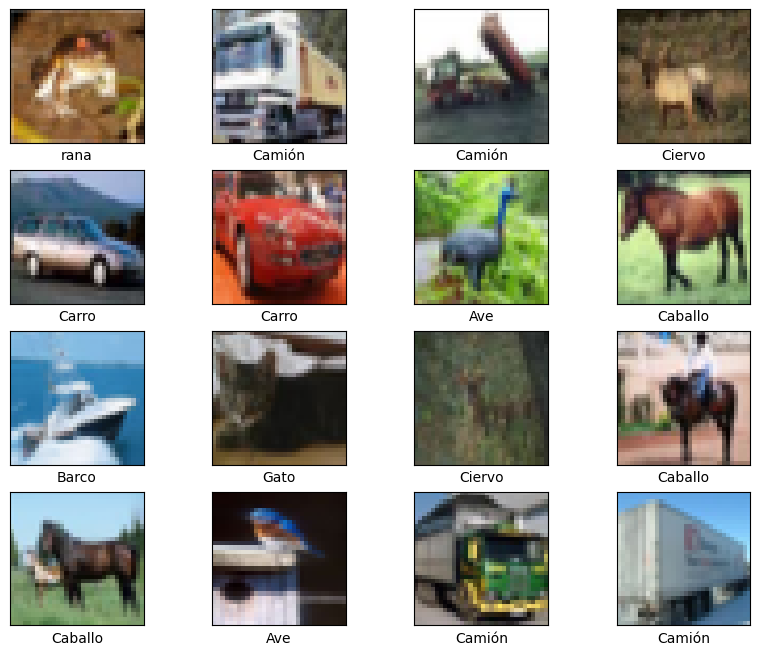

In [ ]:
### Se grafíca un subplot con 16 imágenes
plt.figure(figsize = (10,8))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap = plt.cm.binary)
    plt.xlabel(class_names[y_train[i][0]])

plt.show()


##### Selección de hiérparámetros de la red
Teniendo en cuenta que se trata de un conjunto de datos de 32x32 pixeles a color RGB se debe considerar lo siguientes:

- Capa de entrada debe contar con 32x32x3 neuronas (3072) de manera que cada pixel quede representado dentro de la red
- Deberá contar con una capa de salida de 10 neuronas de manera que cada una represente las respectivas etiquetas del conjunto de datos
- Respecto a las capas ocultas, teniendo en cuenta que se el ejercicio involucra el reconocimiento de imágenes, las redes convolucionales presenta un adecuado comportamiento
- Estas capas ocultas se definen con una ctivación relu en tanto que para la capa de salida se define una función de tipo Softmax, la cual presenta un adecuado comportamiento ante la optimización de la red mediante el descenso de gradiente.


In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation = 'relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation = 'softmax'))

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs = 10, validation_data = (x_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 22s 6ms/step - loss: 1.5139 - accuracy: 0.4476 - val_loss: 1.2232 - val_accuracy: 0.5567
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1358 - accuracy: 0.5983 - val_loss: 1.0684 - val_accuracy: 0.6215
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9909 - accuracy: 0.6524 - val_loss: 1.0081 - val_accuracy: 0.6473
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8928 - accuracy: 0.6891 - val_loss: 0.9290 - val_accuracy: 0.6829
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8217 - accuracy: 0.7148 - val_loss: 0.8681 - val_accuracy: 0.7020
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7590 - accuracy: 0.7349 - val_loss: 0.8612 - val_accuracy: 0.6999
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7133 - accuracy: 0.7506 - val_loss: 0.8635 - val_accuracy

In [ ]:
# ## Métricas de evaluación del modelo
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")

313/313 [==============================] - 1s 3ms/step - loss: 0.8767 - accuracy: 0.7066
Loss: 0.8766772747039795
Accuracy: 0.70660001039505


In [ ]:
### Se guarda el modelo par ano tener que volverlo a correr cada vez
model.save('clasificador.model')

In [ ]:
#Se carga el modelo guardado
model = models.load_model('clasificador.model')


#### Resultados
Como se presenta en la celdas anteriores, el modelo presenta una precisión cercana al 70% con las imágenes del set de prueba

A continuación, se presente la respectiva matriz de confusión

In [ ]:
# #### Matriz de confusión ####
# # Obtener las predicciones del modelo para el conjunto de prueba
y_pred = np.argmax(model.predict(x_test), axis=1)
# # Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

313/313 [==============================] - 1s 4ms/step


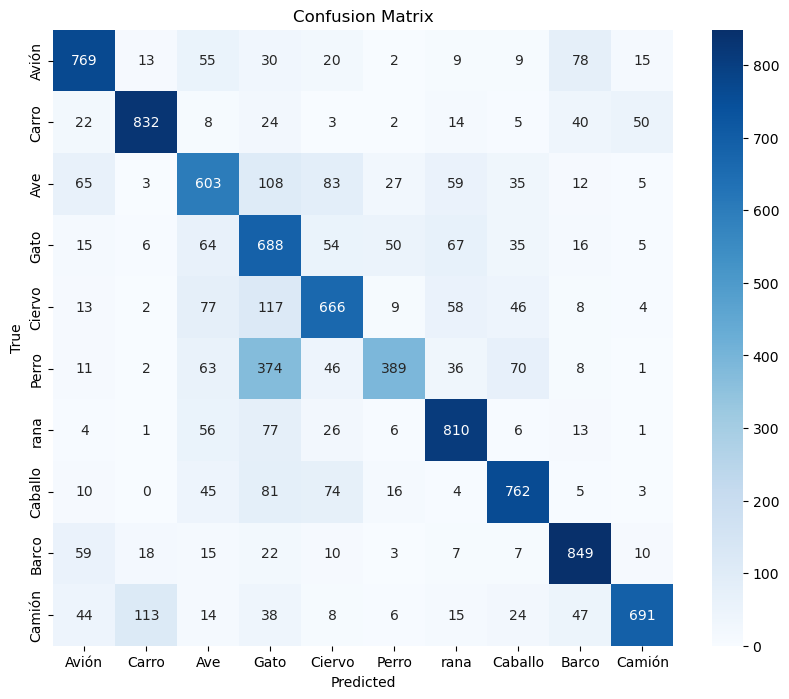

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

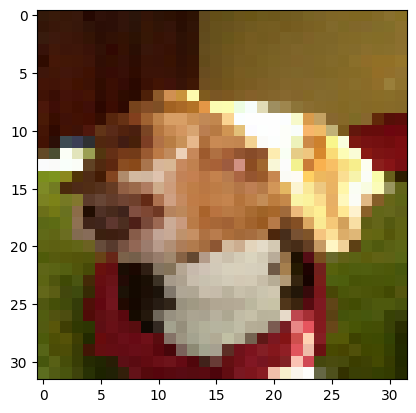

numpy.ndarray

In [ ]:
### datos de prueba de galería propia
path = "Imagen1.jpeg"
img = cv.imread(path)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)


nuevo_ancho = 32
nuevo_alto = 32
imagen_redimensionada1 = cv.resize(img, (nuevo_ancho, nuevo_alto))

plt.imshow(imagen_redimensionada1, cmap=plt.cm.binary)
plt.show()
cv.waitKey(0)
cv.destroyAllWindows()
type(img)


In [ ]:
prediction = model.predict(np.array([imagen_redimensionada1])/255)
index = np.argmax(prediction)
print(f'La imagen corresponde a: {class_names[index]}')

1/1 [==============================] - 0s 19ms/step
La imagen corresponde a: Perro


In [ ]:
print(prediction)

[[7.8688832e-03 1.3712898e-04 1.1586568e-02 1.4524458e-01 2.5005808e-02
  6.5554076e-01 6.8435080e-02 8.5451156e-02 2.1854046e-04 5.1139033e-04]]


Tal y como se aprecia, el modelo determina correctamente que el elemento en la imagen corresponde aun avión

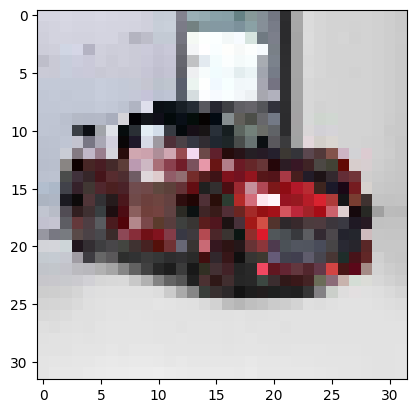

numpy.ndarray

In [ ]:
path = "carro.jpeg"
img = cv.imread(path)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)


nuevo_ancho = 32
nuevo_alto = 32
imagen_redimensionada1 = cv.resize(img, (nuevo_ancho, nuevo_alto))

plt.imshow(imagen_redimensionada1, cmap=plt.cm.binary)
plt.show()
cv.waitKey(0)
cv.destroyAllWindows()
type(img)


In [ ]:
prediction = model.predict(np.array([imagen_redimensionada1])/255)
index = np.argmax(prediction)
print(f'La imagen corresponde a: {class_names[index]}')

1/1 [==============================] - 0s 20ms/step
La imagen corresponde a: Camión
